In [1]:
from ray.tune import Analysis, ExperimentAnalysis
import json
import os
import matplotlib.pyplot as plt

In [2]:
df_cols = ['accuracy', 'training_iteration', 'config/linear_attention', 'config/simple', 'config/ode', 'config/attention_norm_idx', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale', 'config/leaky_relu_slope', 'config/heads', 'config/attention_dim']

In [3]:
cols = ['accuracy', 'training_iteration', 'config/num_init', 'config/function', 'config/block', 'config/simple', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']

In [4]:
cols_gdc = ['accuracy', 'training_iteration', 'config/num_init', 'config/reweight_attention', 'config/gdc_k', 'config/ppr_alpha', 'config/function', 'config/block', 'config/simple', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']

In [5]:
cols_OGB = ['accuracy', 'loss','training_iteration', 'config/num_init', 'config/function', 'config/block', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']

In [6]:
cols_OGB2 = ['accuracy', 'train_acc', 'loss','training_iteration', 'config/num_init', 'config/function', 'config/block', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']

In [7]:
att_cols = ['accuracy', 'training_iteration', 'config/num_init', 'config/function', 'config/block', 'config/simple', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale', 'config/attention_norm_idx', 'config/leaky_relu_slope', 'config/heads', 'config/attention_dim']

In [8]:
def get_analysis(folder, cols = df_cols):
    analysis = Analysis("../ray_tune/{}".format(folder))
    df = analysis.dataframe(metric='accuracy', mode='max')
    return df.sort_values('accuracy', ascending=False)[cols]

In [9]:
cd workspace/graph-neural-pde/src/

/home/ubuntu/workspace/graph-neural-pde/src


In [ ]:
# df = get_analysis('OGB_test', attcols)
df = get_analysis('arxiv_att_lap', cols_OGB2)
print(len(df))

In [11]:
df.head(50)

NameError: name 'df' is not defined

In [14]:
df = get_analysis('cora_linear_attention_adjoint', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
839,0.841176,8,1,laplacian,attention,True,9.467218,0.045691,128,0.090197,...,1,0.105893,adam,sc,dopri5,19.151238,0,0.021136,4,32
741,0.835294,42,1,laplacian,attention,True,9.233718,0.017205,64,0.056208,...,1,0.113497,adam,sc,dopri5,79.029124,0,0.209435,1,16
335,0.833824,9,1,laplacian,attention,True,7.028487,0.019480,64,0.168277,...,1,0.073304,adamax,sc,dopri5,199.299153,0,0.112471,1,32
515,0.833088,28,1,laplacian,attention,True,6.428322,0.039234,128,0.110913,...,1,0.022329,adamax,sc,dopri5,281.896844,0,0.010744,8,32
93,0.832353,39,1,laplacian,attention,True,7.477695,0.043330,128,0.094890,...,1,0.043805,adamax,sc,dopri5,276.501519,0,0.327346,4,64
559,0.832353,16,1,laplacian,attention,True,12.949749,0.023065,128,0.082748,...,1,0.027731,adamax,sc,dopri5,10.917066,0,0.690536,4,32
956,0.831618,6,1,laplacian,attention,True,5.437045,0.022390,128,0.063144,...,1,0.095481,adam,sc,dopri5,77.693612,0,0.336846,4,64
825,0.830147,16,1,laplacian,attention,True,11.328355,0.016335,64,0.061399,...,1,0.108459,adam,sc,dopri5,438.618765,1,0.030484,8,32
674,0.828676,7,1,laplacian,attention,True,5.325921,0.034785,64,0.082904,...,0,0.040187,adam,sc,dopri5,283.168554,0,0.209941,2,16
235,0.826471,7,1,laplacian,attention,True,13.302385,0.031721,64,0.055766,...,1,0.044246,adam,sc,dopri5,554.046401,0,0.301026,4,64


In [11]:
df = get_analysis('cora_linear_attention', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
410,0.831618,13,1,laplacian,attention,True,5.297022,0.057209,128,0.090972,...,1,0.027169,adam,sc,dopri5,27.202209,0,0.293280,2,64
146,0.829412,9,1,laplacian,attention,True,10.858463,0.033029,64,0.109510,...,1,0.077425,adamax,sc,dopri5,694.230557,0,0.160637,4,32
226,0.829412,38,1,laplacian,attention,True,10.763222,0.019052,64,0.102150,...,1,0.131322,adamax,sc,dopri5,11.385769,0,0.281495,4,64
436,0.825735,48,1,laplacian,attention,True,7.490573,0.047416,64,0.083234,...,1,0.069927,adam,sc,dopri5,2.051014,0,0.332457,8,128
183,0.825000,16,1,laplacian,attention,True,8.275382,0.022822,128,0.062261,...,1,0.037294,adamax,sc,dopri5,1.002931,1,0.430557,4,64
140,0.824265,40,1,laplacian,attention,True,5.547613,0.046842,64,0.063061,...,1,0.142149,adamax,sc,dopri5,38.328454,0,0.135554,8,64
359,0.823529,9,1,laplacian,attention,True,5.462685,0.046321,64,0.056783,...,1,0.142733,adam,sc,dopri5,56.013122,0,0.544748,2,32
388,0.822794,16,1,laplacian,attention,True,5.584894,0.054015,64,0.109935,...,0,0.095653,adamax,sc,dopri5,585.321078,0,0.589790,2,16
863,0.822059,37,1,laplacian,attention,True,11.195341,0.014807,64,0.052992,...,1,0.126694,adam,sc,dopri5,184.632991,1,0.296727,8,128
531,0.821324,36,1,laplacian,attention,True,6.209974,0.016229,64,0.103460,...,0,0.087178,adamax,sc,dopri5,13.730400,0,0.117180,8,16


In [8]:
df = get_analysis('cora_gdc_attention_reweight', cols_gdc)
df.head(50)

,accuracy,training_iteration,config/num_init,config/reweight_attention,config/gdc_k,config/ppr_alpha,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
957,0.812500,36,1,True,32,0.177514,laplacian,attention,True,5.557409,0.011904,128,0.150504,0.623852,1,0.034329,adamax,sc,dopri5,170.991647
59,0.809559,23,1,True,32,0.154845,laplacian,attention,True,5.760347,0.029723,128,0.099933,0.509392,0,0.074157,adamax,sc,dopri5,1.729994
674,0.809559,27,1,True,32,0.064599,laplacian,attention,True,5.563991,0.031203,128,0.063565,0.693345,1,0.125418,adamax,sc,dopri5,52.610847
41,0.808088,47,1,True,32,0.170348,laplacian,attention,True,5.462810,0.052585,128,0.122118,0.384186,0,0.007614,adam,sc,dopri5,1.439674
77,0.807353,16,1,True,32,0.159653,laplacian,attention,True,6.118446,0.027449,128,0.161312,0.262796,1,0.128467,adamax,sc,dopri5,1.857345
855,0.804412,39,1,True,16,0.053314,laplacian,attention,True,10.512753,0.015629,64,0.065968,0.627679,1,0.144092,adam,sc,dopri5,24.401932
750,0.804412,43,1,True,16,0.114661,laplacian,attention,True,12.789705,0.049221,128,0.067760,0.540465,1,0.093901,adam,sc,dopri5,9.851352
589,0.803676,34,1,True,16,0.144542,laplacian,attention,True,8.776032,0.015006,64,0.147922,0.543897,0,0.109967,adam,sc,dopri5,3.386989
546,0.803676,49,1,True,16,0.174922,laplacian,attention,True,5.815597,0.046707,64,0.091873,0.444450,0,0.128006,adam,sc,dopri5,117.785819
486,0.803676,49,1,True,32,0.110040,laplacian,attention,True,5.501935,0.054133,64,0.054022,0.288926,0,0.011786,adamax,sc,dopri5,71.868824


In [9]:
len(df)

659

In [8]:
df = get_analysis('cora_gdc_attention', cols_gdc)
df.head(50)

,accuracy,training_iteration,config/num_init,config/gdc_k,config/ppr_alpha,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
281,0.808824,33,1,16,0.187291,laplacian,attention,True,5.596581,0.048136,128,0.115161,0.295168,1,0.097719,adam,sc,dopri5,6.500810
313,0.808824,31,1,16,0.099755,laplacian,attention,True,6.685351,0.035283,128,0.088260,0.516838,1,0.028645,adamax,sc,dopri5,29.716782
385,0.808088,35,1,16,0.051394,laplacian,attention,True,6.838901,0.016145,64,0.142800,0.268408,1,0.054265,adam,sc,dopri5,3.763866
68,0.805882,49,1,32,0.110927,laplacian,attention,True,5.112760,0.048964,128,0.182440,0.419127,1,0.087785,adamax,sc,dopri5,21.919627
100,0.802206,18,1,64,0.173904,laplacian,attention,True,5.475997,0.042186,64,0.050422,0.694915,0,0.082302,adam,sc,dopri5,3.781094
384,0.800735,47,1,32,0.102579,laplacian,attention,True,7.118768,0.024586,64,0.182545,0.387592,1,0.149610,adamax,sc,dopri5,3.427532
406,0.799265,49,1,16,0.135041,laplacian,attention,True,5.349314,0.038774,64,0.065905,0.589325,0,0.130862,adamax,sc,dopri5,345.012228
272,0.799265,21,1,16,0.018663,laplacian,attention,True,6.357873,0.025153,64,0.050291,0.707498,1,0.009479,adam,sc,dopri5,699.523946
316,0.798529,40,1,32,0.113680,laplacian,attention,True,5.183971,0.044318,128,0.108000,0.485989,1,0.090784,adamax,sc,dopri5,7.519190
64,0.798529,16,1,64,0.108196,laplacian,attention,True,7.450335,0.026591,64,0.080123,0.692729,1,0.146466,adam,sc,dopri5,7.402942


In [14]:
df = get_analysis('cora_gdc_weights', cols_gdc)
df.head(50)

,accuracy,training_iteration,config/num_init,config/gdc_k,config/ppr_alpha,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
127,0.832353,26,1,128,0.157907,laplacian,constant,True,5.852980,0.053961,128,0.081290,0.386835,1.801089,0.127476,adam,sc,dopri5,2.039764
309,0.830147,32,1,64,0.116376,laplacian,constant,True,8.743005,0.014936,64,0.051767,0.655454,1.979927,0.013087,adam,sc,dopri5,5.881264
38,0.829412,8,1,32,0.116522,laplacian,constant,True,5.916216,0.027738,64,0.130375,0.653937,0.937127,0.009221,adamax,sc,dopri5,553.914633
498,0.829412,32,1,64,0.196098,laplacian,constant,True,15.102599,0.032273,128,0.107416,0.452858,2.538323,0.128502,adamax,sc,dopri5,74.490028
552,0.829412,49,1,64,0.192010,laplacian,constant,True,18.950321,0.020640,128,0.094303,0.415014,1.735334,0.070352,adam,sc,dopri5,497.022619
743,0.827206,32,1,128,0.141837,laplacian,constant,True,8.753190,0.019084,64,0.192742,0.545710,2.403541,0.083340,adamax,sc,dopri5,109.334765
666,0.827206,23,1,128,0.147122,laplacian,constant,True,6.735623,0.037022,128,0.079141,0.432561,0.323703,0.012171,adamax,sc,dopri5,2.105081
838,0.827206,42,1,128,0.127846,laplacian,constant,True,5.251716,0.057480,128,0.089891,0.485647,2.558542,0.037759,adam,sc,dopri5,90.696841
106,0.826471,38,1,128,0.196068,laplacian,constant,True,10.735623,0.020468,64,0.079692,0.521276,1.716770,0.140317,adamax,sc,dopri5,162.244061
152,0.826471,33,1,128,0.180102,laplacian,constant,True,10.037104,0.028382,64,0.059322,0.412287,2.503358,0.004405,adam,sc,dopri5,168.179326


In [10]:
df = get_analysis('cora_gdc_search', cols_gdc)
df.tail(50)

,accuracy,training_iteration,config/num_init,config/gdc_k,config/ppr_alpha,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
470,0.225000,9,1,128,0.018182,laplacian,constant,True,14.444946,0.084420,64,0.072164,0.386870,0.124693,0.041847,adamax,sc,dopri5,547.023635
138,0.223529,5,1,128,0.078151,laplacian,constant,True,8.319661,0.092639,64,0.119191,0.466658,0.491935,0.024318,rmsprop,sc,dopri5,5.838427
96,0.219853,10,1,128,0.130328,laplacian,constant,True,12.666567,0.090653,128,0.195451,0.677433,1.501235,0.080815,adam,sc,dopri5,6.975500
163,0.218382,5,1,32,0.026801,laplacian,constant,True,16.102089,0.093899,64,0.067785,0.568572,2.436831,0.047338,rmsprop,sc,dopri5,404.285948
4,0.216912,7,1,64,0.047935,laplacian,constant,True,17.157331,0.050717,64,0.054648,0.449192,1.730489,0.022799,rmsprop,sc,dopri5,117.974277
936,0.216176,8,1,128,0.151025,laplacian,constant,True,17.954759,0.022403,64,0.194117,0.205562,0.168442,0.097767,adamax,sc,dopri5,1.519614
753,0.215441,7,1,128,0.176976,laplacian,constant,True,17.079536,0.099496,64,0.056530,0.664663,2.527760,0.057836,adamax,sc,dopri5,1.344159
309,0.212500,8,1,128,0.071829,laplacian,constant,True,12.752544,0.069170,64,0.175685,0.733262,0.111281,0.022485,adamax,sc,dopri5,625.004442
415,0.211765,10,1,128,0.194024,laplacian,constant,True,19.477925,0.070930,64,0.061192,0.207829,2.076053,0.070612,adamax,sc,dopri5,2.935464
995,0.211765,7,1,32,0.120206,laplacian,constant,True,14.679922,0.063263,128,0.151117,0.379797,1.347877,0.099550,rmsprop,sc,dopri5,379.245080


In [7]:
df = get_analysis('cora_gdc', cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
551,0.795588,44,1,laplacian,constant,True,5.664705,0.026797,128,0.061767,0.351748,2.152810,0.016736,adamax,sc,dopri5,146.803474
817,0.795588,36,1,laplacian,constant,True,5.065228,0.044567,64,0.099785,0.302108,1.521634,0.029797,adam,sc,dopri5,5.146453
740,0.791176,45,1,laplacian,constant,True,5.226619,0.031156,64,0.060870,0.540341,0.838943,0.094380,adam,sc,dopri5,2.922393
498,0.791176,49,1,laplacian,constant,True,5.510539,0.038558,128,0.059892,0.568634,2.875502,0.018662,adam,sc,dopri5,32.303276
571,0.790441,37,1,laplacian,constant,True,5.288758,0.029304,64,0.091658,0.321165,0.863777,0.080293,adamax,sc,dopri5,1.346417
40,0.790441,49,1,laplacian,constant,True,5.742357,0.055809,64,0.069733,0.397583,1.549149,0.061597,adam,sc,dopri5,557.659583
671,0.789706,17,1,laplacian,constant,True,7.528491,0.020066,128,0.090093,0.759201,2.853596,0.100335,adamax,sc,dopri5,9.374578
477,0.789706,45,1,laplacian,constant,True,5.008966,0.052438,64,0.078902,0.387802,2.368245,0.050187,adamax,sc,dopri5,115.505446
152,0.788971,45,1,laplacian,constant,True,6.275521,0.011075,64,0.086734,0.204869,2.578469,0.049316,adamax,sc,dopri5,562.901773
215,0.788971,29,1,laplacian,constant,True,5.738497,0.017860,64,0.058582,0.676494,2.431924,0.080883,adam,sc,dopri5,13.631797


In [11]:
df = get_analysis('cora_2hop', cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
656,0.831618,10,1,laplacian,constant,True,5.314638,0.015226,64,0.107238,0.324925,2.790060,0.006993,adamax,sc,dopri5,12.501431
497,0.824265,30,1,laplacian,constant,True,5.051620,0.037077,64,0.081064,0.725891,2.812083,0.097625,adamax,sc,dopri5,3.216601
164,0.822794,39,1,laplacian,constant,True,5.860487,0.015158,128,0.052411,0.522520,1.891333,0.058876,adamax,sc,dopri5,878.189878
875,0.822059,19,1,laplacian,constant,True,5.117430,0.023874,128,0.082688,0.347893,1.170091,0.148958,adamax,sc,dopri5,428.524966
878,0.821324,34,1,laplacian,constant,True,5.319533,0.045586,64,0.056283,0.500833,1.615875,0.142717,adamax,sc,dopri5,27.834552
218,0.820588,23,1,laplacian,constant,True,7.173040,0.014494,64,0.061449,0.516907,2.936510,0.027588,adamax,sc,dopri5,12.628831
348,0.820588,41,1,laplacian,constant,True,5.342347,0.061356,64,0.091847,0.587196,2.308233,0.008200,adam,sc,dopri5,8.586561
630,0.819853,32,1,laplacian,constant,True,6.684284,0.017040,128,0.075351,0.227939,1.406483,0.066164,adam,sc,dopri5,5.759653
510,0.819118,31,1,laplacian,constant,True,5.143358,0.011200,64,0.114976,0.724850,0.668064,0.048283,adam,sc,dopri5,48.636640
839,0.818382,36,1,laplacian,constant,True,8.070656,0.031608,64,0.052715,0.683766,1.713035,0.060485,adamax,sc,dopri5,11.939462


In [7]:
df = get_analysis('cora_GAT_refactor', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
921,0.824,14,1,GAT,constant,True,5.181122,0.010977,128,0.016929,...,0,0.069394,adamax,vc,dopri5,125.196842,1,0.123458,1,16
253,0.820,32,1,GAT,constant,True,5.973845,0.033597,64,0.024581,...,1,0.021259,adamax,vc,dopri5,209.309713,0,0.508791,8,64
811,0.818,24,1,GAT,constant,True,11.978765,0.011621,128,0.008101,...,0,0.004306,adam,vc,dopri5,314.248731,1,0.175387,2,16
815,0.816,29,1,GAT,constant,True,7.019288,0.014363,64,0.006792,...,1,0.064463,adam,vc,dopri5,852.988301,0,0.540599,4,32
821,0.814,19,1,GAT,constant,True,7.870668,0.026988,128,0.030060,...,1,0.041760,adamax,vc,dopri5,6.443496,0,0.561975,8,16
256,0.814,10,1,GAT,constant,True,5.298511,0.028646,128,0.020448,...,1,0.092590,adam,vc,dopri5,555.441328,0,0.496943,8,128
110,0.814,33,1,GAT,constant,True,5.252788,0.015301,64,0.005956,...,0,0.109935,adam,vc,dopri5,295.630097,0,0.227950,8,64
98,0.814,10,1,GAT,constant,True,9.632886,0.013007,128,0.017949,...,1,0.025460,adam,vc,dopri5,249.955759,1,0.008147,8,64
525,0.814,8,1,GAT,constant,True,5.447573,0.012369,128,0.014760,...,0,0.052150,adam,vc,dopri5,106.150222,1,0.575367,4,128
845,0.812,48,1,GAT,constant,True,7.831485,0.010455,128,0.013296,...,0,0.118156,adamax,vc,dopri5,2.047087,0,0.422727,4,64


In [10]:
df = get_analysis('cora_transformer_refactor_test', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
183,0.824,23,1,transformer,constant,True,16.929610,0.012108,128,0.045482,...,0.5,0.093292,adamax,vc,dopri5,1.029171,0,0.562698,4,64
289,0.818,31,1,transformer,constant,True,7.257687,0.020405,64,0.010684,...,2.0,0.074227,adam,vc,dopri5,29.543695,0,0.016843,8,16
192,0.816,33,1,transformer,constant,True,9.882872,0.033445,128,0.015216,...,1.0,0.003052,adam,vc,dopri5,807.108875,0,0.164257,2,128
297,0.816,15,1,transformer,constant,True,12.703849,0.018751,128,0.041553,...,2.0,0.078399,adamax,vc,dopri5,6.255503,0,0.153021,2,128
591,0.816,44,1,transformer,constant,True,5.951271,0.019084,64,0.016871,...,0.5,0.099475,adam,vc,dopri5,43.543426,1,0.632791,8,16
172,0.814,28,1,transformer,constant,True,7.984167,0.011075,128,0.022581,...,1.0,0.096525,adam,vc,dopri5,44.797003,0,0.273452,4,16
467,0.814,44,1,transformer,constant,True,10.059350,0.012056,64,0.030638,...,0.5,0.081257,adamax,vc,dopri5,146.582077,0,0.431801,2,64
189,0.814,36,1,transformer,constant,True,10.437851,0.010589,64,0.044443,...,0.5,0.069856,adam,vc,dopri5,108.715743,0,0.171258,8,64
318,0.814,21,1,transformer,constant,True,10.541247,0.032503,64,0.025462,...,2.0,0.051026,adam,vc,dopri5,290.521729,1,0.679026,1,32
675,0.812,23,1,transformer,constant,True,7.246906,0.020265,128,0.024978,...,2.0,0.131085,adamax,vc,dopri5,16.534680,1,0.368639,8,128


In [20]:
df = get_analysis('cora_mixed_block_refactor_test', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
696,0.824,33,1,laplacian,mixed,True,10.799867,0.014320,64,0.020221,...,0.5,0.055533,adamax,vc,dopri5,172.780629,1,0.521814,4,64
382,0.824,30,1,laplacian,mixed,True,11.001167,0.017972,64,0.012282,...,0.5,0.024660,adam,vc,dopri5,47.982625,1,0.291530,8,64
472,0.822,35,1,laplacian,mixed,True,15.073066,0.011134,128,0.023923,...,0.5,0.086966,adamax,vc,dopri5,22.299628,1,0.226988,4,128
443,0.822,21,1,laplacian,mixed,True,15.161808,0.021822,64,0.038363,...,2.0,0.025545,adamax,vc,dopri5,758.391005,1,0.371783,4,64
212,0.820,21,1,laplacian,mixed,True,9.396730,0.015000,64,0.029513,...,2.0,0.028915,adamax,vc,dopri5,40.570957,1,0.203090,8,128
322,0.820,44,1,laplacian,mixed,True,19.964383,0.012147,128,0.011028,...,0.5,0.092182,adam,vc,dopri5,213.904934,1,0.635699,8,64
240,0.820,33,1,laplacian,mixed,True,12.323182,0.026395,64,0.033311,...,1.0,0.041664,adamax,vc,dopri5,23.615610,1,0.634417,1,128
576,0.818,45,1,laplacian,mixed,True,12.852851,0.030223,128,0.016757,...,1.0,0.023485,adam,vc,dopri5,786.631151,1,0.146416,4,32
232,0.818,47,1,laplacian,mixed,True,16.584825,0.010669,64,0.021750,...,2.0,0.075197,adamax,vc,dopri5,743.788887,1,0.168366,4,16
947,0.818,17,1,laplacian,mixed,True,11.530097,0.027058,128,0.018825,...,0.5,0.097299,adam,vc,dopri5,15.652376,1,0.182505,8,32


In [18]:
df = get_analysis('cora_attention_block_refactor_test', att_cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,...,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/attention_norm_idx,config/leaky_relu_slope,config/heads,config/attention_dim
711,0.824,10,1,laplacian,attention,True,7.452918,0.013322,64,0.027807,...,2.0,0.098524,adam,vc,dopri5,756.980160,1,0.449870,2,128
610,0.820,34,1,laplacian,attention,True,5.549802,0.010268,128,0.041897,...,0.0,0.064428,adamax,vc,dopri5,541.415872,0,0.138004,8,32
645,0.820,14,1,laplacian,attention,True,12.291188,0.020008,64,0.036515,...,2.0,0.143105,adamax,vc,dopri5,637.749526,1,0.202771,8,64
729,0.820,45,1,laplacian,attention,True,9.815393,0.020474,128,0.025997,...,2.0,0.055543,adamax,vc,dopri5,9.499480,1,0.415936,1,32
901,0.818,20,1,laplacian,attention,True,13.332709,0.026369,128,0.025851,...,1.0,0.025938,adam,vc,dopri5,179.348555,1,0.230122,8,16
719,0.818,21,1,laplacian,attention,True,9.581015,0.037022,128,0.036139,...,2.0,0.108739,adamax,vc,dopri5,3.427068,1,0.232052,1,32
634,0.818,44,1,laplacian,attention,True,10.011075,0.020602,128,0.043866,...,2.0,0.080929,adamax,vc,dopri5,2.530399,1,0.128172,8,32
848,0.818,20,1,laplacian,attention,True,5.701104,0.012607,64,0.011071,...,0.0,0.030332,adam,vc,dopri5,5.702727,1,0.561757,4,16
18,0.818,17,1,laplacian,attention,True,9.664929,0.015267,64,0.025565,...,0.5,0.031018,adamax,vc,dopri5,62.425272,1,0.401077,1,128
409,0.818,31,1,laplacian,attention,True,19.939860,0.026993,128,0.017574,...,1.0,0.060695,adam,vc,dopri5,20.408673,1,0.696368,8,32


In [11]:
cols = ['accuracy', 'training_iteration', 'config/num_init', 'config/function', 'config/block', 'config/simple', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale']
df = get_analysis('cora_refactor_test', cols)
df.head(50)

,accuracy,training_iteration,config/num_init,config/function,config/block,config/simple,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale
246,0.824,42,1,laplacian,constant,True,13.008026,0.014578,128,0.009825,0.286546,2.0,0.019665,adam,vc,dopri5,373.221023
835,0.822,47,1,laplacian,constant,True,11.769411,0.015655,128,0.019685,0.641981,1.0,0.077348,adamax,vc,dopri5,8.556895
503,0.822,31,1,laplacian,constant,True,13.663087,0.024482,128,0.032550,0.309156,0.5,0.081287,adamax,vc,dopri5,193.655467
775,0.822,35,1,laplacian,constant,True,15.810700,0.016521,128,0.014481,0.310725,0.5,0.093455,adamax,vc,dopri5,3.819824
591,0.822,28,1,laplacian,constant,True,18.214935,0.015123,128,0.044220,0.463724,0.5,0.144581,adamax,vc,dopri5,22.295442
47,0.820,33,1,laplacian,constant,True,16.687836,0.010054,64,0.015493,0.443310,2.0,0.007603,adam,vc,dopri5,2.278911
129,0.820,22,1,laplacian,constant,True,10.232833,0.014134,128,0.006626,0.206596,1.0,0.018173,adam,vc,dopri5,36.730818
481,0.820,37,1,laplacian,constant,True,15.176533,0.021374,128,0.019925,0.418223,2.0,0.061642,adam,vc,dopri5,516.621973
551,0.820,44,1,laplacian,constant,True,17.673170,0.012687,128,0.027615,0.754962,2.0,0.107546,adam,vc,dopri5,1.944837
501,0.820,43,1,laplacian,constant,True,13.417777,0.011884,128,0.014793,0.496951,1.0,0.123586,adamax,vc,dopri5,102.352905


In [10]:
df = get_analysis('cora_mix_att_fixed', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
516,0.803,41,False,True,ode,0,7.685505,0.017653,128,0.046301,0.606975,2.0,0.007680,adamax,vc,dopri5,228.957152,0.374941,4,64
405,0.798,14,False,True,ode,0,5.387446,0.013703,64,0.030620,0.776249,1.0,0.028857,adamax,vc,dopri5,379.486521,0.557911,4,64
698,0.795,34,False,True,ode,0,5.993574,0.017918,128,0.005998,0.641607,2.0,0.121569,rmsprop,vc,dopri5,3.009341,0.198148,4,64
140,0.791,33,False,True,ode,0,7.177051,0.017259,128,0.034042,0.212534,2.0,0.133127,adam,vc,dopri5,108.819295,0.251113,4,64
577,0.790,38,False,True,ode,0,5.864191,0.018927,64,0.005575,0.205273,2.0,0.022788,rmsprop,vc,dopri5,52.036925,0.236723,4,64
209,0.790,33,False,True,ode,0,5.200746,0.010252,64,0.023635,0.552334,1.0,0.057281,adamax,vc,dopri5,2.761884,0.087752,4,64
613,0.789,45,False,True,ode,0,7.178822,0.015996,128,0.036229,0.581402,1.0,0.049619,adamax,vc,dopri5,1.538148,0.346335,4,64
540,0.788,34,False,True,ode,0,9.446243,0.013987,128,0.006834,0.704788,2.0,0.010128,adam,vc,dopri5,9.047071,0.315249,4,64
399,0.787,49,False,True,ode,0,5.280008,0.010484,64,0.006110,0.645941,1.0,0.080742,adam,vc,dopri5,18.034230,0.493561,4,64
848,0.787,31,False,True,ode,0,5.218748,0.020422,64,0.031948,0.465955,1.0,0.029542,adam,vc,dopri5,618.825156,0.316581,4,64


In [17]:
df = get_analysis('cora_linear_att1', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
37,0.8045,6,True,True,ode,1,10.063998,0.010270,128,0.025713,0.764285,1,0.037639,adamax,vc,dopri5,34.773530,0.183414,4,32
77,0.8035,29,True,True,ode,1,10.286751,0.030276,128,0.008302,0.662690,1,0.080342,adam,vc,dopri5,1.104994,0.494055,1,16
30,0.8035,31,True,True,ode,1,5.980195,0.019180,64,0.008271,0.757558,0,0.080386,adam,vc,dopri5,533.030843,0.305521,2,32
20,0.8030,37,True,True,ode,0,9.980151,0.014177,64,0.048068,0.249717,0,0.024033,adamax,vc,dopri5,312.776217,0.445767,8,128
89,0.8025,19,True,True,ode,1,8.887431,0.011958,128,0.035467,0.622497,0,0.073194,adamax,vc,dopri5,1.071839,0.122803,4,128
109,0.8025,15,True,True,ode,1,7.447451,0.016149,64,0.032970,0.790719,0,0.074675,adamax,vc,dopri5,13.686089,0.523261,8,32
43,0.8020,14,True,True,ode,1,11.098052,0.027749,128,0.030812,0.649955,1,0.089239,adamax,vc,dopri5,221.633224,0.240003,8,16
36,0.8015,15,True,True,ode,1,9.361800,0.023656,128,0.009323,0.691331,0,0.068221,adam,vc,dopri5,1.305902,0.475960,2,32
95,0.7995,9,True,True,ode,1,5.928655,0.010937,64,0.016582,0.759745,0,0.051576,adam,vc,dopri5,42.319796,0.609926,8,32
134,0.7985,28,True,True,ode,0,5.335460,0.020557,64,0.019750,0.407743,0,0.124758,adamax,vc,dopri5,533.480722,0.339419,2,128


In [22]:
df = get_analysis('cora_linear_att')
df.head(50)

,accuracy,training_iteration,config/simple,config/ode,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
957,0.856,25,False,ode,19.263254,0.004229,128,0.003075,0.637508,1,0.218963,adam,vc,dopri5,4.120889,0.603534,2,16
966,0.855,22,False,ode,6.998325,0.005767,32,0.007109,0.510130,0,0.445020,adamax,vc,dopri5,23.815483,0.479066,8,128
710,0.855,30,False,ode,8.604309,0.005672,32,0.004437,0.733438,0,0.446769,adam,vc,dopri5,3.412958,0.187468,8,16
428,0.854,41,False,ode,9.287396,0.003734,128,0.002863,0.550477,0,0.440886,adam,vc,dopri5,2621.489323,0.207225,2,64
811,0.854,41,False,ode,19.198002,0.003829,128,0.002923,0.739035,0,0.224864,adam,vc,dopri5,362.523682,0.427363,4,128
876,0.853,14,False,ode,12.182285,0.008129,64,0.009234,0.740053,1,0.246603,adamax,vc,dopri5,547.163244,0.045975,8,64
795,0.850,15,False,ode,16.555648,0.009109,128,0.005371,0.586411,1,0.207849,adam,vc,dopri5,3.971421,0.369059,2,32
258,0.850,37,False,ode,9.950902,0.002557,64,0.002374,0.782614,0,0.118221,rmsprop,vc,dopri5,198.351039,0.484535,8,32
454,0.850,20,False,ode,18.082506,0.002103,128,0.002558,0.722196,0,0.053461,adamax,vc,dopri5,4.166829,0.139172,4,128
220,0.849,43,False,ode,16.829336,0.006801,64,0.002352,0.786893,1,0.360733,adam,vc,dopri5,2.067506,0.146289,8,32


In [20]:
df = get_analysis('cora_mix_att_lap1', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
132,0.816,42,False,True,ode,0,9.757078,0.013752,64,0.010642,0.595210,0.0,0.039429,adam,vc,dopri5,12.680011,0.204610,4,64
639,0.813,42,False,True,ode,0,11.965740,0.013453,128,0.024848,0.637203,0.0,0.088653,adamax,vc,dopri5,7.484291,0.060469,4,64
437,0.809,42,False,True,ode,0,6.627659,0.026027,128,0.005825,0.371895,0.0,0.090651,adam,vc,dopri5,4.629969,0.020212,4,64
651,0.808,46,False,True,ode,0,16.807283,0.012657,64,0.021507,0.734655,0.0,0.132103,adamax,vc,dopri5,2.203239,0.142562,4,64
681,0.808,26,False,True,ode,0,7.641704,0.025163,128,0.046951,0.474645,0.0,0.030657,adamax,vc,dopri5,26.362736,0.554162,4,64
286,0.807,49,False,True,ode,0,9.150768,0.018963,128,0.028601,0.313015,0.0,0.119476,adam,vc,dopri5,41.106881,0.240080,4,64
594,0.806,46,False,True,ode,0,19.925626,0.014342,128,0.046921,0.551312,0.0,0.095621,adamax,vc,dopri5,17.498363,0.459101,4,64
7,0.806,43,False,True,ode,0,7.872225,0.020859,128,0.008752,0.503600,0.0,0.072541,adam,vc,dopri5,6.906799,0.462056,4,64
499,0.805,45,False,True,ode,0,6.806802,0.021708,64,0.017470,0.320523,0.0,0.145767,adam,vc,dopri5,81.757398,0.084906,4,64
485,0.805,48,False,True,ode,0,6.163817,0.014439,64,0.007027,0.731899,0.0,0.088299,adamax,vc,dopri5,12.102845,0.481243,4,64


In [14]:
df = get_analysis('cora_mix_att_lap', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
734,0.8115,24,True,True,ode,0,5.034579,0.030557,128,0.013724,0.577378,0,0.121305,adam,vc,dopri5,40.108586,0.699575,8,64
44,0.8070,48,True,True,ode,0,5.338890,0.011290,128,0.041961,0.756109,0,0.029153,adamax,vc,dopri5,6.743395,0.699586,4,8
815,0.8055,32,True,True,ode,0,6.630646,0.016027,64,0.015949,0.771916,0,0.088609,adam,vc,dopri5,1.764674,0.372616,4,32
151,0.8035,32,True,True,ode,0,5.805029,0.015716,64,0.014573,0.373812,0,0.011834,adam,vc,dopri5,214.444100,0.555345,4,128
708,0.8035,47,True,True,ode,0,6.993096,0.023868,128,0.010973,0.533098,0,0.010260,adam,vc,dopri5,449.560624,0.293992,8,128
533,0.8020,42,True,True,ode,0,7.009480,0.017633,64,0.007695,0.598565,0,0.013501,adam,vc,dopri5,985.559778,0.233359,4,128
534,0.8020,49,True,True,ode,0,6.637091,0.019639,128,0.006550,0.685936,0,0.113039,adam,vc,dopri5,1.208735,0.042396,4,128
616,0.8015,22,True,True,ode,0,5.063993,0.050540,128,0.033351,0.518578,0,0.128150,adam,vc,dopri5,171.861102,0.019493,2,16
466,0.8015,44,True,True,ode,0,5.257857,0.019375,128,0.009241,0.666102,0,0.103703,adam,vc,dopri5,4.493543,0.621071,8,128
148,0.8010,8,True,True,ode,0,7.318932,0.011191,64,0.027713,0.547460,0,0.004699,adam,vc,dopri5,145.743980,0.266685,4,32


In [19]:
df = get_analysis('pubmed_linear_att_gp15_adjoint', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
17,0.7660,23,True,True,ode,0,16.947567,0.002493,64,0.021770,0.469988,0,0.356480,adam,vc,dopri5,1.465467,0.574708,2,16
28,0.7565,49,True,True,ode,0,9.467933,0.002546,32,0.014709,0.471460,0,0.011374,adamax,vc,dopri5,596.049194,0.537896,8,64
9,0.7465,10,True,True,ode,1,6.435382,0.002372,128,0.004566,0.335818,1,0.143592,rmsprop,vc,dopri5,587.892808,0.257164,2,16
16,0.7385,45,True,True,ode,0,17.095167,0.008786,16,0.023170,0.283313,1,0.159911,adam,vc,dopri5,183.596692,0.109119,1,64
20,0.7070,11,True,True,ode,0,11.210857,0.007490,64,0.005716,0.319480,0,0.231515,adam,vc,dopri5,1859.622589,0.602421,2,128
26,0.7030,15,True,True,ode,0,16.092763,0.003220,64,0.013236,0.206294,1,0.479999,adamax,vc,dopri5,27.499035,0.734408,1,128
25,0.6965,14,True,True,ode,0,13.884438,0.007852,16,0.002947,0.293876,1,0.414179,rmsprop,vc,dopri5,2363.768482,0.247380,4,128
7,0.6875,10,True,True,ode,0,16.776715,0.002915,32,0.020028,0.410985,1,0.000369,rmsprop,vc,dopri5,2.547346,0.306556,2,32
4,0.6425,12,True,True,ode,0,17.712403,0.002956,16,0.033434,0.267260,0,0.426393,rmsprop,vc,dopri5,347.408957,0.282819,8,16
18,0.5675,15,True,True,ode,1,14.087770,0.006589,128,0.009683,0.303066,1,0.434309,adam,vc,dopri5,24.852619,0.321284,1,64


In [5]:
df = get_analysis('citeseer_linear_att_gp15_adjoint', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
132,0.729,20,True,False,ode,1,11.270092,0.006649,128,0.002573,0.581731,1,0.760301,rmsprop,vc,dopri5,15.188618,0.394326,4,16
62,0.725,9,True,False,ode,0,10.041195,0.002757,32,0.007207,0.739463,1,0.578119,adamax,vc,dopri5,45.447023,0.395433,4,128
225,0.725,28,True,False,ode,0,9.882741,0.006202,64,0.006829,0.743101,0,0.641376,rmsprop,vc,dopri5,55.050719,0.165974,2,128
123,0.722,15,True,True,ode,0,7.907330,0.007327,32,0.000704,0.721450,1,0.582770,rmsprop,vc,dopri5,536.876014,0.315121,8,128
203,0.722,15,True,True,ode,0,11.424664,0.004810,128,0.000694,0.634337,1,0.439501,adam,vc,dopri5,627.054097,0.594722,8,32
11,0.722,9,True,True,ode,1,17.287487,0.003834,64,0.003070,0.578936,1,0.711115,rmsprop,vc,dopri5,9762.782325,0.314235,2,32
213,0.721,5,True,True,ode,0,9.316063,0.006260,128,0.001576,0.664975,1,0.299667,adam,vc,dopri5,151.474198,0.546208,4,16
266,0.720,26,True,True,ode,0,13.702249,0.009532,32,0.003202,0.664136,0,0.652539,adam,vc,dopri5,230.540506,0.382596,8,128
279,0.719,14,True,False,ode,0,16.481720,0.003669,64,0.003138,0.477280,1,0.547959,rmsprop,vc,dopri5,216.962148,0.619853,8,32
245,0.719,12,True,False,ode,0,12.959526,0.002082,32,0.001888,0.795805,0,0.511253,rmsprop,vc,dopri5,740.061593,0.462270,4,64


<AxesSubplot:xlabel='config/attention_norm_idx'>

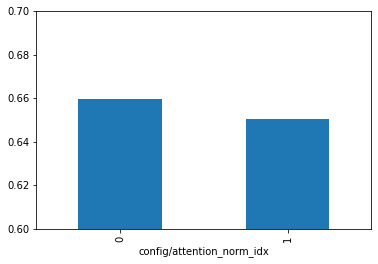

In [13]:
df.groupby(['config/attention_norm_idx'])['accuracy'].mean().plot.bar(ylim=[0.6,0.7])

<AxesSubplot:xlabel='config/simple'>

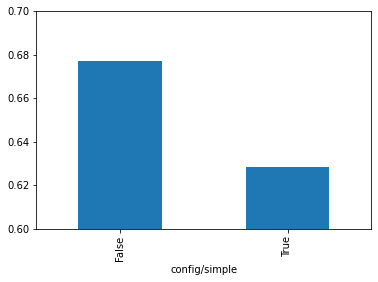

In [14]:
df.groupby(['config/simple'])['accuracy'].mean().plot.bar(ylim=[0.6,0.7])

<AxesSubplot:xlabel='config/attention_dim'>

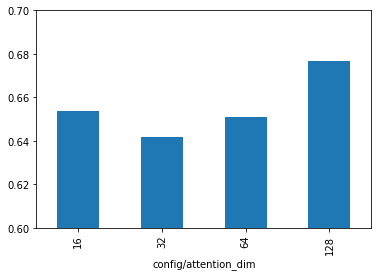

In [15]:
df.groupby(['config/attention_dim'])['accuracy'].mean().plot.bar(ylim=[0.6,0.7])

<AxesSubplot:xlabel='config/optimizer'>

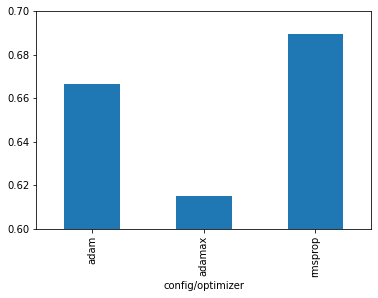

In [18]:
df.groupby(['config/optimizer'])['accuracy'].mean().plot.bar(ylim=[0.6,0.7])

In [15]:
df = get_analysis('citeseer_linear_att_gp15', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
142,0.731,5,True,True,ode,0,11.228949,0.003900,128,0.003316,0.669372,1,0.270932,adamax,vc,dopri5,424.892241,0.086900,8,32
11,0.731,44,True,True,ode,1,8.391221,0.006788,128,0.005416,0.694346,1,0.617471,rmsprop,vc,dopri5,3644.457086,0.430092,4,32
243,0.729,5,True,True,ode,0,9.419232,0.007714,64,0.001324,0.696873,1,0.227410,rmsprop,vc,dopri5,4119.963678,0.316074,2,128
495,0.728,26,True,True,ode,1,6.337568,0.006476,128,0.002277,0.425912,0,0.597366,rmsprop,vc,dopri5,66.199207,0.562118,4,16
728,0.728,38,True,False,ode,1,6.317033,0.009683,128,0.001380,0.693602,0,0.740352,adam,vc,dopri5,5178.980167,0.663055,2,32
984,0.727,30,True,True,ode,0,8.762279,0.009213,128,0.001500,0.528718,1,0.623055,adam,vc,dopri5,284.676088,0.538951,4,32
606,0.726,20,True,False,ode,1,14.783291,0.003307,128,0.000957,0.551848,0,0.651583,rmsprop,vc,dopri5,37.169919,0.047907,2,32
90,0.725,11,True,True,ode,1,9.270641,0.003599,128,0.002182,0.676235,1,0.506925,rmsprop,vc,dopri5,56.721992,0.461394,4,32
835,0.725,26,True,False,ode,1,19.112722,0.003057,64,0.004319,0.520288,0,0.002281,adam,vc,dopri5,23.094661,0.559203,2,64
150,0.724,4,True,True,ode,0,18.949195,0.009088,128,0.001149,0.578865,1,0.714051,rmsprop,vc,dopri5,5556.714064,0.542770,4,16


In [13]:
df = get_analysis('citeseer_linear_att', df_cols)
df.head(50)

,accuracy,training_iteration,config/linear_attention,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
137,0.727,4,True,False,ode,0,17.736218,0.006896,128,0.004899,0.499652,0,0.798528,adamax,vc,dopri5,13.126296,0.267804,4,32
1005,0.724,3,True,False,ode,0,16.933753,0.003826,64,0.005750,0.529547,1,0.484771,adamax,vc,dopri5,890.798094,0.276291,2,32
602,0.723,4,True,True,ode,0,6.006851,0.008824,32,0.005000,0.570016,1,0.725719,rmsprop,vc,dopri5,92.998892,0.223527,2,128
164,0.723,16,True,True,ode,0,14.079085,0.008368,32,0.001062,0.577313,1,0.487144,rmsprop,vc,dopri5,1082.907137,0.234612,4,64
803,0.723,7,True,True,ode,0,12.274066,0.007066,128,0.001189,0.437968,1,0.211471,adam,vc,dopri5,42.185093,0.240564,2,64
222,0.722,5,True,False,ode,0,19.863864,0.002772,64,0.004198,0.590143,1,0.599605,adamax,vc,dopri5,377.023696,0.099868,4,16
598,0.722,12,True,True,ode,0,5.494328,0.008618,128,0.002594,0.582553,1,0.550638,adam,vc,dopri5,638.764485,0.693255,4,16
327,0.721,8,True,True,ode,0,5.943970,0.008505,128,0.002564,0.754150,1,0.006892,adam,vc,dopri5,20.305525,0.579892,2,64
746,0.721,3,True,True,ode,0,7.343665,0.005120,64,0.001831,0.683539,1,0.669498,rmsprop,vc,dopri5,42.480409,0.555805,4,16
736,0.720,4,True,True,ode,0,16.478333,0.005113,64,0.002639,0.659116,1,0.065036,rmsprop,vc,dopri5,3566.132253,0.600510,8,64


In [9]:
df = get_analysis('refactor_test')
df.head(50)

,accuracy,training_iteration,config/simple,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
60,0.855,16,False,ode,1,13.600120,0.005024,128,0.002306,0.605859,0,0.027824,adamax,vc,dopri5,660.852309,0.633148,8,32
189,0.855,32,False,ode,1,19.408723,0.002176,128,0.005697,0.524821,0,0.266938,adamax,vc,dopri5,212.705462,0.654457,8,64
828,0.854,39,False,ode,1,7.631843,0.005507,128,0.003391,0.693599,0,0.106117,adamax,vc,dopri5,2586.834479,0.403966,8,16
760,0.854,19,False,ode,1,13.554850,0.008848,64,0.004447,0.732173,0,0.161928,adam,vc,dopri5,1.712721,0.337695,8,64
938,0.853,28,False,ode,1,14.103493,0.005312,128,0.002347,0.701446,1,0.265031,adamax,vc,dopri5,1586.892285,0.654746,4,64
795,0.852,25,False,ode,1,13.508983,0.009319,64,0.003533,0.550717,0,0.075157,adam,vc,dopri5,1.037079,0.405319,8,128
457,0.851,33,False,ode,1,19.547624,0.003564,32,0.005732,0.634060,0,0.239633,adamax,vc,dopri5,3738.750833,0.613991,8,64
55,0.851,48,False,ode,1,11.926777,0.005938,128,0.002573,0.738225,0,0.041409,adamax,vc,dopri5,4029.016675,0.053431,2,64
505,0.850,34,False,ode,1,19.095287,0.002285,128,0.002871,0.504693,1,0.280640,adam,vc,dopri5,4.582332,0.500332,2,16
577,0.850,38,False,ode,1,9.831523,0.004753,32,0.008193,0.740643,0,0.265295,adamax,vc,dopri5,960.780178,0.445018,8,32


In [6]:
df = get_analysis('cora_att_mix_features')
df.head(50)

,accuracy,training_iteration,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
110,0.788,11,att,0,5.652620,0.002017,64,0.002993,0.728780,1,0.143256,adam,vc,vc,True,dopri5,10.931140,0.300347,4,128
480,0.782,47,att,0,7.691057,0.007416,128,0.001475,0.536593,1,0.251843,rmsprop,vc,vc,True,dopri5,144.882743,0.197576,2,64
405,0.777,32,att,0,6.062769,0.007348,128,0.004000,0.674261,1,0.353828,adam,vc,vc,True,dopri5,63.522863,0.393082,2,64
420,0.771,49,att,0,5.838687,0.009978,128,0.003232,0.634799,1,0.201899,adamax,vc,vc,True,dopri5,4702.819226,0.659119,2,128
329,0.766,49,att,0,5.616978,0.004039,128,0.002517,0.686518,0,0.400562,adamax,vc,vc,True,dopri5,1543.391384,0.666213,8,128
435,0.765,37,att,0,5.279682,0.005259,128,0.003284,0.758679,0,0.379987,adam,vc,vc,True,dopri5,1348.963731,0.639803,4,128
78,0.756,50,att,0,5.993477,0.008048,128,0.005827,0.772853,0,0.069820,adamax,vc,vc,True,dopri5,692.612443,0.296758,4,64
667,0.753,49,att,0,7.153112,0.007053,128,0.006350,0.514534,1,0.477496,adamax,vc,vc,True,dopri5,41.940589,0.448481,8,16
91,0.741,49,att,0,5.292536,0.003993,128,0.002828,0.725207,1,0.010786,rmsprop,vc,vc,True,dopri5,990.737818,0.239750,2,32
428,0.734,48,att,0,5.908603,0.008108,64,0.001362,0.674528,1,0.344596,rmsprop,vc,vc,True,dopri5,141.500024,0.628827,2,16


In [7]:
df = get_analysis('cora_transformer_mix_features')
df.head(50)

,accuracy,training_iteration,config/ode,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
189,0.778,44,transformer_att,0,5.197594,0.003238,128,0.003307,0.663318,0,0.490121,adamax,vc,vc,True,dopri5,4905.490935,0.509181,2,128
815,0.752,48,transformer_att,0,6.465167,0.005332,64,0.001912,0.772470,1,0.125454,adam,vc,vc,True,dopri5,15.749485,0.658440,2,128
242,0.720,39,transformer_att,0,11.489684,0.005059,64,0.001544,0.608321,1,0.275703,adam,vc,vc,True,dopri5,4.157313,0.465499,2,64
299,0.709,47,transformer_att,0,6.061941,0.005654,64,0.001935,0.590619,0,0.499053,adam,vc,vc,True,dopri5,35.958774,0.002453,2,64
200,0.701,49,transformer_att,0,5.639886,0.002724,16,0.005706,0.595916,1,0.352376,adamax,vc,vc,True,dopri5,36.603819,0.365805,2,64
213,0.662,34,transformer_att,0,11.637736,0.003821,64,0.004144,0.785707,0,0.185078,adam,vc,vc,True,dopri5,14.685625,0.034860,2,16
829,0.631,42,transformer_att,0,10.661954,0.002619,128,0.001073,0.788295,1,0.097633,adamax,vc,vc,True,dopri5,3.705788,0.637611,2,128
56,0.535,45,transformer_att,0,5.461572,0.005873,128,0.001072,0.651474,1,0.454769,rmsprop,vc,vc,True,dopri5,940.893684,0.110507,2,128
130,0.528,47,transformer_att,0,16.154921,0.008750,32,0.001989,0.517307,0,0.416956,adam,vc,vc,True,dopri5,363.292997,0.445075,2,64
828,0.492,27,transformer_att,1,5.576188,0.007317,16,0.006689,0.750119,0,0.027139,adamax,vc,vc,True,dopri5,490.363759,0.551966,2,64


In [8]:
df = get_analysis('cora_transformer_norm_idx')
df.head(50)

,accuracy,training_iteration,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/ode,config/attention_dim
121,0.839,43,1,5.342002,0.006749,128,0.001299,0.759066,0,0.060674,rmsprop,vc,vc,True,dopri5,287.477476,0.516003,2,transformer_att,16
82,0.833,12,1,5.644401,0.002090,64,0.001987,0.759460,1,0.042812,rmsprop,vc,vc,True,dopri5,4.677169,0.381464,2,transformer_att,32
97,0.828,42,1,9.752781,0.009128,16,0.002625,0.700161,1,0.391760,rmsprop,vc,vc,True,dopri5,3.865082,0.390722,2,transformer_att,64
66,0.826,38,0,9.737068,0.005392,64,0.004372,0.741098,0,0.206387,adam,vc,vc,True,dopri5,1617.828452,0.111679,8,transformer_att,32
29,0.824,22,0,7.832326,0.003043,128,0.006889,0.540479,1,0.263371,adamax,vc,vc,True,dopri5,5957.174433,0.366766,4,transformer_att,16
74,0.820,13,1,13.900191,0.007766,64,0.001676,0.732950,1,0.004522,rmsprop,vc,vc,True,dopri5,6.914694,0.169988,4,transformer_att,64
43,0.816,18,0,8.984778,0.003153,128,0.001510,0.666993,1,0.132805,rmsprop,vc,vc,True,dopri5,96.590472,0.204755,8,transformer_att,64
113,0.815,10,0,11.161904,0.006193,64,0.006717,0.650595,0,0.223188,adamax,vc,vc,True,dopri5,47.003733,0.513941,2,transformer_att,64
37,0.813,17,0,6.441441,0.008783,32,0.001073,0.695869,1,0.034480,rmsprop,vc,vc,True,dopri5,121.136184,0.046484,2,transformer_att,16
27,0.800,12,1,13.157846,0.002453,64,0.007573,0.747065,1,0.203953,adam,vc,vc,True,dopri5,55.534234,0.340155,4,transformer_att,32


In [18]:
df = get_analysis('cora_att_dim')
print(len(df[df['config/attention_dim']==256]))
df.head(50)

11


,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/ode,config/attention_dim
197,0.833,22,6.725151,0.002595,128,0.005259,0.668834,1,0.172984,adam,vc,vc,True,dopri5,256.642467,0.265069,2,transformer_att,16
302,0.832,19,9.436339,0.002658,32,0.002079,0.600319,0,0.056661,rmsprop,vc,vc,True,dopri5,81.870110,0.372477,2,transformer_att,64
448,0.832,38,10.045297,0.002003,32,0.001553,0.719962,0,0.394084,rmsprop,vc,vc,True,dopri5,1907.922859,0.565542,4,transformer_att,128
700,0.830,44,10.817964,0.007905,128,0.005731,0.790337,1,0.084618,adam,vc,vc,True,dopri5,2411.752754,0.623684,2,transformer_att,128
872,0.827,29,10.311412,0.003031,128,0.001154,0.785433,1,0.407455,rmsprop,vc,vc,True,dopri5,7.187396,0.297694,2,transformer_att,32
148,0.826,29,5.440710,0.009484,128,0.008659,0.647236,1,0.495637,adamax,vc,vc,True,dopri5,5.122810,0.205446,2,transformer_att,128
780,0.825,27,11.749374,0.003319,128,0.004109,0.747253,1,0.233583,adam,vc,vc,True,dopri5,1314.319955,0.040001,4,att,64
831,0.825,35,12.638970,0.003020,64,0.001879,0.684199,1,0.104394,rmsprop,vc,vc,True,dopri5,82.706898,0.111144,4,transformer_att,16
597,0.825,40,7.099710,0.005673,128,0.001637,0.720920,1,0.428970,rmsprop,vc,vc,True,dopri5,1510.946950,0.567710,8,transformer_att,256
821,0.824,31,8.337821,0.003274,64,0.004462,0.530637,1,0.121973,adam,vc,vc,True,dopri5,7.145862,0.233125,8,transformer_att,32


In [45]:
df = get_analysis('cora_transformer_mh')
df.head(50)

,accuracy,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
473,0.833,1.0,22,8.428713,0.004343,16,0.003818,0.719204,0,0.371022,rmsprop,vc,vc,True,dopri5,4.482005,0.022853,4
712,0.832,1.0,3,6.730762,0.005247,128,0.002080,0.625201,0,0.361991,rmsprop,vc,vc,True,dopri5,451.394128,0.117821,4
577,0.832,1.0,47,6.607719,0.003196,128,0.009560,0.727204,0,0.048629,adam,vc,vc,True,dopri5,923.915113,0.252433,2
72,0.830,1.0,23,11.515854,0.002275,128,0.005238,0.661208,1,0.346793,adam,vc,vc,True,dopri5,4808.175389,0.692550,8
486,0.829,1.0,39,13.242548,0.002368,128,0.004471,0.648762,1,0.120535,adamax,vc,vc,True,dopri5,23.529885,0.514937,2
146,0.829,1.0,21,6.234344,0.005101,32,0.002355,0.793213,1,0.185628,rmsprop,vc,vc,True,dopri5,8304.711714,0.342142,4
858,0.828,1.0,13,13.014622,0.008457,128,0.001159,0.796477,1,0.047277,rmsprop,vc,vc,True,dopri5,1076.142428,0.420398,2
275,0.828,1.0,37,9.702590,0.003367,64,0.005070,0.668953,1,0.072535,adamax,vc,vc,True,dopri5,7704.567065,0.496682,4
365,0.828,1.0,20,7.225773,0.007796,64,0.002103,0.735680,1,0.091631,rmsprop,vc,vc,True,dopri5,2530.536154,0.581919,4
553,0.828,1.0,33,11.098023,0.002560,128,0.003616,0.609472,1,0.354870,adam,vc,vc,True,dopri5,86.857421,0.631467,4


In [40]:
df = get_analysis('cora_transformer_adjoint')
df.head(50)

,accuracy,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
26,0.826,1055.418658,48,7.492686,0.007462,32,0.008811,0.604116,1,0.161117,adam,vc,vc,True,dopri5,7.483022,0.419735,5
90,0.824,423.781564,49,9.509379,0.006708,64,0.005307,0.753360,0,0.081021,adam,vc,vc,True,dopri5,358.635423,0.121762,3
40,0.819,125.974818,35,12.067874,0.004022,32,0.007092,0.551061,1,0.136512,adam,vc,vc,True,dopri5,15.523095,0.108833,1
17,0.815,4323.386410,44,11.410621,0.009497,64,0.006343,0.698125,1,0.010132,adam,vc,vc,True,dopri5,269.983217,0.133449,1
0,0.814,223.385114,23,10.092461,0.002761,64,0.007045,0.589183,1,0.193075,adam,vc,vc,True,dopri5,1519.786233,0.348725,10
16,0.814,47.698559,16,9.772073,0.002180,64,0.003164,0.563411,1,0.270322,adam,vc,vc,True,dopri5,186.041812,0.132795,9
89,0.810,1186.953877,24,5.080560,0.002735,64,0.004612,0.608352,1,0.061884,adam,vc,vc,True,dopri5,48.019705,0.411059,8
81,0.806,3887.668788,7,12.570614,0.004083,64,0.006337,0.729292,0,0.081625,adam,vc,vc,True,dopri5,10.549197,0.496803,1
84,0.805,4067.502211,21,14.048834,0.002447,16,0.007706,0.524593,0,0.229608,adam,vc,vc,True,dopri5,12.099929,0.554074,10
65,0.804,80183.131421,49,5.688087,0.004358,64,0.001466,0.791276,1,0.091549,adam,vc,vc,True,dopri5,504.244994,0.137786,3


In [21]:
cols = ['accuracy', 'training_iteration', 'config/simple', 'config/ode', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/method', 'config/tol_scale', 'config/leaky_relu_slope', 'config/heads']
df = get_analysis('cora_transformer', cols)
df.head(50)

,accuracy,training_iteration,config/simple,config/ode,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
139,0.863,9,True,ode,9.588650,0.009912,128,0.005408,0.736114,0,0.267104,adam,dopri5,16.368486,0.397431,8
518,0.860,10,True,ode,9.316640,0.005142,128,0.005245,0.782875,1,0.201339,adam,dopri5,1.803632,0.045701,9
810,0.859,44,True,ode,15.934325,0.004966,64,0.003193,0.663018,0,0.282958,adam,dopri5,605.786976,0.552450,3
851,0.857,13,True,ode,17.235751,0.005114,64,0.002337,0.759148,1,0.001657,adam,dopri5,21.457710,0.125340,5
903,0.856,27,True,ode,16.686392,0.007334,32,0.004570,0.554591,1,0.011814,adam,dopri5,54.055116,0.299053,8
366,0.855,44,True,ode,16.876461,0.007342,64,0.002007,0.572594,1,0.292978,adam,dopri5,1035.931775,0.098836,1
310,0.855,16,True,ode,12.352493,0.002286,128,0.002600,0.675593,1,0.235371,adam,dopri5,1.516177,0.659322,8
804,0.855,31,True,ode,9.864025,0.008395,128,0.002607,0.645921,0,0.175585,adam,dopri5,2327.047543,0.549800,11
680,0.855,11,True,ode,17.702808,0.008646,64,0.004591,0.664541,1,0.000216,adam,dopri5,259.019840,0.672229,9
408,0.852,12,True,ode,11.932387,0.007457,128,0.002613,0.697063,0,0.114152,adam,dopri5,729.068909,0.600964,7


In [7]:
df = get_analysis('pubmed_transformer')
df.head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
6,0.780,38,10.718516,0.002081,64,0.031896,0.543604,0,0.349475,adam,vc,vc,True,dopri5,1.054087,0.472804,9
13,0.758,44,5.825743,0.003185,64,0.008253,0.480095,0,0.282447,adam,vc,vc,True,dopri5,454.399797,0.536533,1
18,0.755,49,7.201342,0.005670,64,0.002952,0.530991,1,0.187575,rmsprop,vc,vc,True,dopri5,4287.416007,0.730529,8
5,0.745,49,9.440127,0.002045,16,0.011991,0.713326,0,0.521898,adam,vc,vc,True,dopri5,6.601381,0.391600,2
4,0.652,3,6.785455,0.006933,64,0.018321,0.415594,1,0.127588,adamax,vc,vc,True,dopri5,4.358722,0.420769,7
0,0.611,3,5.467200,0.005408,32,0.015529,0.481667,1,0.424570,rmsprop,vc,vc,True,dopri5,434.132693,0.526676,5
14,0.597,4,7.766020,0.003266,32,0.002146,0.704784,1,0.768214,rmsprop,vc,vc,True,dopri5,2.756411,0.266723,9
16,0.589,4,16.402101,0.004806,128,0.008099,0.769010,1,0.536643,adam,vc,vc,True,dopri5,3.036159,0.628930,5
12,0.585,2,14.799589,0.008833,32,0.018900,0.586676,1,0.731077,adamax,vc,vc,True,dopri5,5.887320,0.512370,5
2,0.491,5,16.251039,0.006421,32,0.013312,0.428264,1,0.570371,adamax,vc,vc,True,dopri5,1.334369,0.694036,1


In [7]:
cols = ['accuracy', 'config/adjoint', 'config/tol_scale_adjoint', 'training_iteration', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 
           'config/beta_dim', 'config/alpha_sigmoid', 'config/method', 'config/tol_scale', 'config/leaky_relu_slope', 'config/heads']
df = get_analysis('citeseer_transformer', cols)
df.head(50)

,accuracy,config/adjoint,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
786,0.732,False,1.0,25,7.723841,0.006784,64,0.001483,0.636404,0,0.775328,rmsprop,vc,vc,True,dopri5,31.787157,0.667220,9
687,0.729,False,1.0,35,8.723342,0.005112,64,0.002979,0.738117,1,0.560368,rmsprop,vc,vc,True,dopri5,217.143421,0.613573,2
715,0.726,False,1.0,25,8.577238,0.002144,64,0.008450,0.414473,0,0.752324,adam,vc,vc,True,dopri5,414.887364,0.644931,3
470,0.724,False,1.0,25,9.977886,0.009573,64,0.002718,0.408772,1,0.315300,adam,vc,vc,True,dopri5,412.820587,0.426814,6
939,0.724,False,1.0,20,6.340214,0.006582,64,0.007243,0.597222,0,0.525606,adam,vc,vc,True,dopri5,981.345426,0.616233,3
956,0.724,False,1.0,16,9.267258,0.008678,64,0.001851,0.695669,0,0.538983,rmsprop,vc,vc,True,dopri5,708.326285,0.301584,1
355,0.724,False,1.0,5,9.724947,0.003237,32,0.007520,0.695384,1,0.506355,adamax,vc,vc,True,dopri5,150.100583,0.213976,9
662,0.722,False,1.0,27,7.588916,0.009230,64,0.005239,0.651622,0,0.101548,adamax,vc,vc,True,dopri5,10.485083,0.461863,8
140,0.721,False,1.0,40,8.203648,0.003976,32,0.002104,0.751866,0,0.591843,rmsprop,vc,vc,True,dopri5,2850.495472,0.665776,4
168,0.721,False,1.0,20,5.153311,0.008967,64,0.005461,0.498503,1,0.647299,adam,vc,vc,True,dopri5,34.054551,0.004713,3


In [8]:
df = get_analysis('cora_transformer1', cols)
df.head(50)

,accuracy,config/adjoint,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
255,0.830,False,1.000000,21,10.427490,0.003867,64,0.008199,0.601544,0,0.061088,adam,vc,vc,True,dopri5,139.097009,0.378382,9
789,0.830,False,1.000000,24,6.131573,0.003156,64,0.006068,0.794005,1,0.247908,adam,vc,vc,True,dopri5,153.649866,0.300788,6
906,0.830,False,1.000000,22,6.260374,0.009078,64,0.007824,0.602181,1,0.218447,adam,vc,vc,True,dopri5,7380.276885,0.522903,1
746,0.829,False,1.000000,22,6.542574,0.003467,64,0.005417,0.776562,1,0.150353,adam,vc,vc,True,dopri5,40.233265,0.295891,3
782,0.828,False,1.000000,35,8.158548,0.002722,64,0.003307,0.637383,0,0.187667,adam,vc,vc,True,dopri5,56.814341,0.440398,2
251,0.827,True,28.243438,37,9.732311,0.002364,64,0.002969,0.602566,1,0.067379,adam,vc,vc,True,dopri5,5.647059,0.102442,11
854,0.826,False,1.000000,25,7.846449,0.002234,64,0.005962,0.657864,1,0.001325,adam,vc,vc,True,dopri5,5.487381,0.126926,5
5,0.825,False,1.000000,20,9.558722,0.002227,32,0.005873,0.690549,0,0.026367,adam,vc,vc,True,dopri5,79.201992,0.670490,2
709,0.825,False,1.000000,45,7.540293,0.004317,64,0.006900,0.688703,1,0.094388,adam,vc,vc,True,dopri5,37.631565,0.052388,4
249,0.824,False,1.000000,46,5.842503,0.009876,64,0.005857,0.563386,1,0.183344,adam,vc,vc,True,dopri5,2.183802,0.321643,2


<AxesSubplot:xlabel='config/self_loop_weight'>

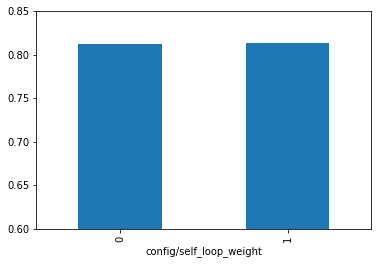

In [16]:
df[0:100].groupby(['config/self_loop_weight'])['accuracy'].mean().plot.bar(ylim=[0.6,0.85])

In [30]:
cols = ['accuracy', 'config/tol_scale_adjoint', 'config/adjoint', 'training_iteration', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 
           'config/beta_dim', 'config/alpha_sigmoid', 'config/method', 'config/tol_scale', 'config/leaky_relu_slope', 'config/heads']
df = get_analysis('cora_transformer', cols)
df.tail(50)

,accuracy,config/tol_scale_adjoint,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
444,0.388,1.0,5,18.908827,0.005482,16,0.001481,0.659023,0,0.021661,adam,vc,vc,True,dopri5,1399.438425,0.686991,3
216,0.388,1.0,5,9.991832,0.004624,16,0.001229,0.571992,1,0.088589,adam,vc,vc,True,dopri5,37.562826,0.697349,9
202,0.385,1.0,5,11.661566,0.003761,16,0.001416,0.583458,1,0.155171,adam,vc,vc,True,dopri5,9.783036,0.128495,9
948,0.381,1.0,5,6.115115,0.003478,16,0.001154,0.724517,0,0.249501,adam,vc,vc,True,dopri5,36.045708,0.544606,9
70,0.379,1.0,5,12.506175,0.003150,16,0.001787,0.779173,0,0.151938,adam,vc,vc,True,dopri5,2175.913748,0.102026,1
798,0.378,1.0,5,11.231326,0.006018,16,0.001071,0.747485,0,0.100689,adam,vc,vc,True,dopri5,24.199907,0.399102,11
641,0.369,1.0,5,8.438508,0.002913,16,0.002176,0.780212,0,0.150110,adam,vc,vc,True,dopri5,71.112419,0.284552,6
790,0.360,1.0,5,9.026543,0.007120,16,0.002646,0.683460,0,0.292397,adam,vc,vc,True,dopri5,11.794065,0.637968,2
377,0.358,1.0,5,6.387499,0.002571,32,0.001197,0.656206,0,0.058526,adam,vc,vc,True,dopri5,140.777425,0.119158,10
779,0.358,1.0,5,18.017023,0.002226,16,0.001584,0.518228,1,0.044927,adam,vc,vc,True,dopri5,9.073504,0.221005,11


In [25]:
analysis1 = Analysis("../ray_tune/ray_exp")

In [30]:
df1 = analysis1.dataframe(metric='accuracy', mode='max')

In [31]:
df1.sort_values('accuracy', ascending=False)[df_cols].head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/rtol,config/self_loop_weight,config/dropout,config/optimizer
328,0.792,4,3.584172,0.010554,128,0.013234,0.199886,0.000823,4.089269,0.379822,adam
247,0.790,6,2.432022,0.003876,64,0.004767,0.510662,0.000005,3.043529,0.024794,adagrad
72,0.790,4,3.539216,0.018903,128,0.009876,0.200042,0.023176,2.868196,0.641930,adam
59,0.786,10,1.851907,0.000863,128,0.003495,0.475181,0.083060,1.111141,0.016158,adam
387,0.780,5,3.241908,0.003007,128,0.015825,0.359506,0.000011,3.700952,0.436238,adam
45,0.780,6,3.246911,0.005754,128,0.001144,0.151629,0.000083,0.222399,0.515960,rmsprop
182,0.780,13,1.901879,0.000377,128,0.002049,0.064115,0.011408,0.672847,0.071567,adamax
68,0.778,20,1.363791,0.005187,64,0.005748,0.628163,0.000875,1.582195,0.592904,adagrad
337,0.776,7,2.249969,0.007292,128,0.001164,0.454108,0.000159,4.632477,0.220174,rmsprop
34,0.772,7,3.660820,0.007320,64,0.001167,0.208219,0.000006,2.272709,0.384428,rmsprop


In [2]:
analysis2 = Analysis("../ray_tune/alpha_beta")
df2 = analysis2.dataframe(metric='accuracy', mode='max')
df2.sort_values('accuracy', ascending=False).head(50)

,loss,accuracy,time_this_iter_s,should_checkpoint,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,...,config/rtol,config/save,config/seed,config/self_loop_weight,config/tau,config/time,config/use_cora_defaults,config/use_gold,config/weight,logdir
76,0.911699,0.806,1.655889,True,False,NaN,NaN,6,025546b2877240f98ee2e8245aa67b5f,2020-11-05_12-04-33,...,0.009364,/,1,1.182354,1.0,2.942686,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00076_76_...
138,0.708644,0.790,2.544190,True,False,NaN,NaN,16,52db80f67407454eba5e6ebb222edeb6,2020-11-05_12-07-58,...,0.000008,/,1,2.580785,1.0,3.677500,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00128_128...
158,0.310763,0.788,3.308189,True,False,NaN,NaN,14,d437d4d51c2840859f7ee5b7e60b863b,2020-11-05_12-02-48,...,0.001931,/,1,1.304196,1.0,3.397623,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00045_45_...
36,0.212033,0.784,1.963419,True,False,NaN,NaN,19,aeb42c7570d3410d8ae1d0820e1695f0,2020-11-05_12-09-48,...,0.010393,/,1,2.439829,1.0,3.781897,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00160_160...
54,0.240845,0.784,5.972566,True,False,NaN,NaN,18,5168729c9ba44059ad745002df2c2fcf,2020-11-05_12-02-27,...,0.000033,/,1,4.896133,1.0,3.928432,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00030_30_...
58,0.048032,0.784,1.280773,True,False,NaN,NaN,22,5ed1efe4ba804963998a4bd345aac25e,2020-11-05_12-05-10,...,0.005960,/,1,3.223322,1.0,3.563908,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00082_82_...
17,0.307705,0.782,2.985675,True,False,NaN,NaN,31,77e18b7fe7ed47f296e8b2231a717a4b,2020-11-05_12-00-50,...,0.000019,/,1,4.762862,1.0,2.334599,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00006_6_a...
24,0.759564,0.782,1.965723,True,False,NaN,NaN,5,36966b3d1e494d79bcb25ee070f70d8a,2020-11-05_12-03-41,...,0.000005,/,1,3.711430,1.0,2.388496,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00065_65_...
73,0.354782,0.772,3.339570,True,False,NaN,NaN,18,f574f907c3714517940c3ab15670b57d,2020-11-05_12-11-13,...,0.069857,/,1,4.958748,1.0,3.454542,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00180_180...
85,0.485872,0.772,1.518221,True,False,NaN,NaN,24,0564f5fd78ce41b5a3fe23770e4b621a,2020-11-05_12-03-42,...,0.000542,/,1,1.353683,1.0,2.540228,False,1,False,../ray_tune/alpha_beta/DEFAULT_57f50_00059_59_...


In [6]:
df2.sort_values('accuracy', ascending=False)['logdir'].head()

76     ../ray_tune/alpha_beta/DEFAULT_57f50_00076_76_...
138    ../ray_tune/alpha_beta/DEFAULT_57f50_00128_128...
158    ../ray_tune/alpha_beta/DEFAULT_57f50_00045_45_...
36     ../ray_tune/alpha_beta/DEFAULT_57f50_00160_160...
54     ../ray_tune/alpha_beta/DEFAULT_57f50_00030_30_...
Name: logdir, dtype: object

In [7]:
best_params_dir = df2.sort_values('accuracy', ascending=False)['logdir'].iloc[0]
best_params_dir

'../ray_tune/alpha_beta/DEFAULT_57f50_00076_76_alpha_dim=sc,beta_dim=vc,decay=0.0013047,dropout=0.049651,hidden_dim=64,input_dropout=0.41894,lr=0.0070708,_2020-11-05_12-04-19'

In [ ]:
../ray_tune/alpha_beta/DEFAULT_57f50_00076_76_...

In [10]:
best_params_dir

'../ray_tune/alpha_beta/DEFAULT_57f50_00051_51_alpha_dim=sc,beta_dim=vc,decay=0.0083681,dropout=0.79553,hidden_dim=128,input_dropout=0.13905,lr=0.0042581,_2020-11-05_12-02-35'

In [7]:
with open(best_params_dir + '/params.json') as f:
    best_params = json.loads(f.read())

In [11]:
with open(best_params_dir + '/result.json') as f:
    best_params = json.loads(f.read())

JSONDecodeError: Extra data: line 2 column 1 (char 1517)

In [6]:
trials = analysis2.trial_dataframes

In [9]:
analysis3 = Analysis("../ray_tune/ode")
df3 = analysis3.dataframe(metric='accuracy', mode='max')
df3.sort_values('accuracy', ascending=False)[df_cols].head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/rtol,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim
27,0.820,11,2.631246,0.006899,64,0.005545,0.219733,0.000006,1.627475,0.747882,adagrad,vc,sc
99,0.814,3,3.673874,0.024628,128,0.010432,0.168112,0.024034,0.223349,0.660773,adam,sc,sc
10,0.804,5,2.197401,0.000736,64,0.016836,0.661571,0.001793,0.129404,0.058596,adamax,sc,vc
180,0.796,5,1.938928,0.005021,128,0.019085,0.732561,0.000002,0.326908,0.017251,adam,vc,sc
19,0.794,6,2.424346,0.000233,128,0.019782,0.608253,0.004482,1.915208,0.785832,adamax,vc,sc
17,0.794,26,3.000400,0.004190,32,0.009838,0.179985,0.000003,1.192267,0.699882,adam,vc,sc
110,0.794,31,2.450611,0.007434,32,0.024470,0.745407,0.001876,2.540593,0.517452,adagrad,sc,sc
153,0.792,21,3.419810,0.000251,128,0.010965,0.749069,0.006697,0.177121,0.657064,adamax,vc,sc
102,0.792,19,3.163368,0.000899,128,0.014886,0.543614,0.000001,1.662095,0.775744,adamax,vc,vc
175,0.790,8,3.920102,0.000102,32,0.015237,0.768653,0.011405,3.885232,0.306128,adagrad,sc,vc


In [14]:
analysis4 = Analysis("../ray_tune/sigmoid")
df4 = analysis4.dataframe(metric='accuracy', mode='max')
df4.sort_values('accuracy', ascending=False)[df_cols].head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/rtol,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid
37,0.796,28,1.363170,0.000446,64,0.001063,0.451478,0.000016,4.089492,0.312112,rmsprop,sc,sc,False
104,0.790,6,3.726086,0.000196,128,0.001288,0.042969,0.064270,2.452987,0.127203,rmsprop,vc,sc,True
49,0.786,8,2.874601,0.001866,64,0.013678,0.146628,0.040333,2.176035,0.793029,adam,vc,sc,False
185,0.786,18,3.954406,0.000724,64,0.010214,0.091221,0.000104,3.023662,0.784927,adamax,vc,vc,False
33,0.784,17,2.398755,0.002209,64,0.014273,0.306477,0.000031,2.891086,0.671093,adam,vc,vc,True
72,0.780,13,3.063975,0.007607,64,0.001226,0.537115,0.066406,2.087476,0.083786,rmsprop,sc,sc,True
56,0.774,8,3.502654,0.002696,128,0.013290,0.402772,0.000015,3.379731,0.438377,adagrad,vc,sc,True
25,0.774,10,3.467509,0.004789,64,0.007680,0.371333,0.001714,2.778738,0.452790,adam,sc,vc,True
105,0.770,5,3.066937,0.001161,128,0.009074,0.107557,0.000038,0.161943,0.296488,adamax,vc,vc,True
48,0.768,6,1.602761,0.000416,128,0.019296,0.282441,0.021477,4.536170,0.745604,adamax,vc,vc,False


In [10]:
analysis5 = Analysis("../ray_tune/pop")
df5 = analysis5.dataframe(metric='accuracy', mode='max')
df5.sort_values('accuracy', ascending=False)[df_cols].head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/rtol,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid
147,0.820,52,2.715048,0.009148,64,0.013627,0.417872,0.000034,4.018271,0.234089,adagrad,vc,sc,False
105,0.816,102,2.970520,0.000120,32,0.010149,0.126468,0.000131,4.790782,0.153146,adam,vc,sc,True
89,0.816,51,1.907710,0.000212,64,0.001212,0.274722,0.000017,4.247283,0.682639,adam,vc,sc,True
103,0.814,104,3.834875,0.002057,16,0.001021,0.138992,0.000038,1.248773,0.508131,adamax,vc,sc,True
102,0.812,103,2.890263,0.006889,128,0.001139,0.571242,0.092936,3.534900,0.484536,adam,sc,sc,False
77,0.812,77,2.746570,0.037225,32,0.001042,0.415673,0.009545,3.691279,0.135537,adagrad,sc,sc,True
170,0.812,101,1.238322,0.004377,32,0.006454,0.552007,0.000249,3.352104,0.033026,adam,vc,vc,True
32,0.812,103,3.389906,0.004878,32,0.023422,0.776276,0.000005,0.430452,0.310103,adam,vc,vc,False
163,0.812,96,2.946021,0.097284,16,0.003486,0.687288,0.088683,1.798066,0.475791,adam,sc,vc,True
110,0.812,62,1.933251,0.049769,128,0.001384,0.753550,0.000046,4.938817,0.077028,rmsprop,vc,vc,True


In [13]:
analysis6 = Analysis("../ray_tune/method")
df6 = analysis6.dataframe(metric='accuracy', mode='max')
df6.sort_values('accuracy', ascending=False)[df_cols].head(50)

865     midpoint
327     midpoint
148          rk4
972        euler
136       dopri5
57        dopri5
234          rk4
251        euler
241       dopri5
765          rk4
988          rk4
1032         rk4
505          rk4
1061       euler
18         euler
623          rk4
253     midpoint
978     midpoint
350       dopri5
376     midpoint
59      midpoint
1034    midpoint
1062       euler
883          rk4
798     midpoint
1102    midpoint
1154         rk4
1196      dopri5
927       dopri5
948       dopri5
288     midpoint
940          rk4
99           rk4
909          rk4
994       dopri5
778     midpoint
1076         rk4
433        euler
537        euler
708       dopri5
85           rk4
878       dopri5
1144         rk4
630        euler
561     midpoint
88         euler
993       dopri5
1176      dopri5
45      midpoint
75      midpoint
Name: config/method, dtype: object

In [18]:
analysis7 = Analysis("../ray_tune/tol")
df7 = analysis7.dataframe(metric='accuracy', mode='max')
df7.sort_values('accuracy', ascending=False)[df_cols].head(10)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale
1694,0.822,7,7.067578,0.006074,32,0.008852,0.668526,0.875943,0.077063,adam,vc,vc,True,dopri5,34.977842
1315,0.820,3,7.810756,0.004244,64,0.009452,0.192564,3.219164,0.138573,adam,sc,vc,False,dopri5,688.469426
1594,0.820,43,3.016472,0.006137,64,0.016715,0.735351,0.848562,0.615659,adam,sc,vc,False,dopri5,235.041107
1804,0.818,9,4.133139,0.030158,64,0.007660,0.381014,2.544326,0.705284,adam,vc,vc,False,dopri5,211.293048
468,0.816,47,8.134641,0.004606,64,0.019231,0.770778,2.504545,0.153273,adam,sc,vc,False,dopri5,365.099322
2009,0.816,45,5.290815,0.008372,32,0.020151,0.668356,3.552880,0.035425,adam,sc,vc,False,dopri5,6272.091470
1716,0.816,20,6.482962,0.003018,32,0.012393,0.124503,2.958067,0.283930,adam,vc,vc,False,dopri5,138.549005
1880,0.816,9,6.990339,0.029880,64,0.010392,0.247574,3.160102,0.454890,adam,vc,vc,False,dopri5,4779.486869
1030,0.814,27,8.767799,0.003136,16,0.008606,0.236358,0.145948,0.236899,adam,vc,vc,False,dopri5,79.510791
1551,0.814,19,8.773808,0.044225,64,0.008550,0.514653,2.415155,0.438548,adam,vc,vc,False,dopri5,907.896127


In [28]:
os.listdir(df8.sort_values('accuracy', ascending=False)['logdir'].iloc[0])

['params.json',
 'checkpoint_140',
 'checkpoint_1400',
 'checkpoint_660',
 'checkpoint_540',
 'checkpoint_525',
 'checkpoint_1015',
 'checkpoint_1',
 'checkpoint_750',
 'checkpoint_770',
 'checkpoint_350',
 'checkpoint_185',
 'checkpoint_1910',
 'checkpoint_475',
 'checkpoint_1380',
 'checkpoint_1330',
 'checkpoint_545',
 'checkpoint_1325',
 'checkpoint_7',
 'checkpoint_14',
 'checkpoint_900',
 'checkpoint_1290',
 'checkpoint_330',
 'checkpoint_30',
 'checkpoint_1125',
 'checkpoint_1780',
 'checkpoint_930',
 'checkpoint_1255',
 'checkpoint_105',
 'checkpoint_1495',
 'checkpoint_240',
 'checkpoint_1430',
 'checkpoint_615',
 'checkpoint_620',
 'checkpoint_1705',
 'checkpoint_345',
 'checkpoint_1385',
 'checkpoint_740',
 'checkpoint_450',
 'checkpoint_1945',
 'checkpoint_15',
 'checkpoint_945',
 'checkpoint_11',
 'checkpoint_1960',
 'checkpoint_605',
 'checkpoint_1575',
 'checkpoint_440',
 'checkpoint_995',
 'checkpoint_1215',
 'checkpoint_1630',
 'events.out.tfevents.1604676572.ip-172-31

In [26]:
analysis8 = Analysis("../ray_tune/pop1")
cols8 = ['accuracy', 'training_iteration', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 
           'config/beta_dim', 'config/alpha_sigmoid', 'config/method', 'config/tol_scale']
df8 = analysis8.dataframe(metric='accuracy', mode='max')
df8.sort_values('accuracy', ascending=False)[cols8].head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale
206,0.834,624,7.447958,0.011482,16,0.019929,0.129463,3.270390,0.794557,adam,vc,vc,True,dopri5,2916.387751
200,0.834,623,6.565438,0.030668,32,0.010199,0.709176,3.068905,0.066715,adam,vc,vc,True,dopri5,41.340528
84,0.830,653,9.929899,0.002055,16,0.017967,0.439070,1.240530,0.699433,adam,vc,vc,True,dopri5,82031.991064
168,0.830,650,4.370176,0.035198,16,0.008029,0.588160,2.765862,0.373037,adam,vc,vc,True,dopri5,18.647898
230,0.828,573,4.055677,0.003336,32,0.017058,0.252793,2.690808,0.087780,adam,vc,vc,True,dopri5,184.365513
227,0.828,595,2.515828,0.006239,16,0.005065,0.003967,1.120197,0.587324,adam,vc,vc,True,dopri5,93.393457
61,0.826,623,9.582296,0.016245,16,0.006409,0.262207,1.209937,0.042366,adam,vc,vc,True,dopri5,59.256469
28,0.826,491,8.997552,0.002329,32,0.010034,0.255201,2.206273,0.089531,adam,vc,vc,True,dopri5,22933.176459
155,0.826,656,7.703720,0.015155,16,0.029921,0.768119,4.544355,0.364068,adam,vc,vc,True,dopri5,27.670603
66,0.826,569,6.070061,0.006944,16,0.002722,0.217685,0.591923,0.368028,adam,vc,vc,True,dopri5,98006.876279


In [10]:
analysis9 = Analysis("../ray_tune/relu_slope")
df9 = analysis9.dataframe(metric='accuracy', mode='max')
df9.sort_values('accuracy', ascending=False)[df_cols].head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope
80,0.820,37,8.503293,0.003817,32,0.004312,0.683881,0.984270,0.135354,adam,vc,vc,True,dopri5,486.159724,0.614213
118,0.816,30,5.911846,0.006089,32,0.005307,0.717256,1.612319,0.057371,adam,vc,vc,True,dopri5,236.218610,0.382314
610,0.816,44,9.659685,0.005693,32,0.008197,0.648216,0.633752,0.201786,adam,vc,vc,True,dopri5,1319.495369,0.271354
813,0.814,18,9.800858,0.004686,32,0.004392,0.514576,0.438659,0.141798,adam,vc,vc,True,dopri5,13.816818,0.137730
333,0.814,14,6.182052,0.007700,32,0.006391,0.774076,0.046125,0.006391,adam,vc,vc,True,dopri5,7083.300058,0.118667
266,0.814,42,9.100948,0.004806,32,0.007484,0.676324,1.737044,0.165069,adam,vc,vc,True,dopri5,3926.621627,0.303906
493,0.814,24,9.350402,0.002652,32,0.005934,0.759430,1.154307,0.244195,adam,vc,vc,True,dopri5,4738.794213,0.048609
879,0.814,49,9.651632,0.005803,32,0.009010,0.655571,1.547393,0.259998,adam,vc,vc,True,dopri5,88.752032,0.101646
7,0.812,6,9.398147,0.005153,32,0.009125,0.673561,0.571095,0.109418,adam,vc,vc,True,dopri5,103.442170,0.121486
421,0.812,45,7.000263,0.002092,32,0.006267,0.646668,1.903192,0.023235,adam,vc,vc,True,dopri5,2801.042958,0.476107


In [4]:
analysis10 = Analysis("../ray_tune/heads")
df10 = analysis10.dataframe(metric='accuracy', mode='max')
df10.sort_values('accuracy', ascending=False)[df_cols].head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
428,0.826,31,7.597235,0.007401,32,0.004915,0.707650,1.253590,0.202281,adam,vc,vc,True,dopri5,30.248381,0.669290,2
405,0.824,7,9.894102,0.002619,32,0.005090,0.558786,1.315183,0.040411,adam,vc,vc,True,dopri5,7142.070206,0.000472,8
733,0.824,9,8.896250,0.009764,32,0.006955,0.739026,1.910417,0.010252,adam,vc,vc,True,dopri5,655.116449,0.028734,3
34,0.820,33,7.542785,0.003653,32,0.008022,0.576734,1.514954,0.102124,adam,vc,vc,True,dopri5,799.962838,0.014361,1
503,0.818,19,5.913767,0.002480,32,0.006977,0.783931,0.909546,0.081518,adam,vc,vc,True,dopri5,230.774811,0.463384,3
82,0.818,20,9.069488,0.002426,32,0.005263,0.677182,1.165336,0.123414,adam,vc,vc,True,dopri5,891.927100,0.093443,5
500,0.818,38,8.237441,0.006849,32,0.005836,0.727446,1.071152,0.169135,adam,vc,vc,True,dopri5,95.402705,0.394898,5
552,0.818,41,8.815798,0.006611,32,0.009718,0.633817,1.338476,0.092197,adam,vc,vc,True,dopri5,108.245975,0.345597,7
565,0.816,31,8.455385,0.003513,32,0.008601,0.574209,0.315104,0.202677,adam,vc,vc,True,dopri5,813.687703,0.595293,5
475,0.816,37,9.361902,0.008148,32,0.003384,0.708444,1.518925,0.038678,adam,vc,vc,True,dopri5,347.432666,0.415603,2


In [5]:
analysis11 = Analysis("../ray_tune/heads_dims")
df11 = analysis11.dataframe(metric='accuracy', mode='max')
df11.sort_values('accuracy', ascending=False)[df_cols].head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
784,0.826,19,9.243491,0.008863,64,0.008027,0.760068,0.607263,0.143974,adam,vc,vc,True,dopri5,645.609459,0.128629,4
587,0.826,11,6.841433,0.005145,32,0.005414,0.559924,0.716669,0.065759,adam,vc,vc,True,dopri5,216.945118,0.472918,3
487,0.822,9,8.689028,0.006259,64,0.005001,0.564864,1.407100,0.224932,adam,vc,vc,True,dopri5,1301.263949,0.007491,3
209,0.820,8,5.563875,0.005664,64,0.005775,0.656679,0.664217,0.241773,adam,vc,vc,True,dopri5,747.766194,0.030393,9
668,0.820,40,6.547465,0.006777,64,0.009897,0.676604,1.960400,0.104659,adam,vc,vc,True,dopri5,2317.344228,0.024723,8
863,0.818,31,8.846595,0.008242,32,0.005322,0.665920,1.002104,0.105441,adam,vc,vc,True,dopri5,860.951294,0.071571,4
144,0.818,20,8.390504,0.009822,32,0.003661,0.614764,1.371109,0.215768,adam,vc,vc,True,dopri5,51.446187,0.004358,6
234,0.816,9,9.849645,0.002105,64,0.005586,0.743996,1.838906,0.196522,adam,vc,vc,True,dopri5,2661.973529,0.585940,9
651,0.812,45,8.761727,0.004223,32,0.009748,0.684657,1.114100,0.205785,adam,vc,vc,True,dopri5,1179.444284,0.201221,6
650,0.812,30,9.151018,0.003428,32,0.008307,0.573098,0.434766,0.187663,adam,vc,vc,True,dopri5,13.493841,0.204076,7


In [12]:
df = get_analysis('citeseer')
df.head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
2179,0.742,4,7.714412,0.005694,32,0.006917,0.703313,0.000000,0.209159,adam,vc,vc,True,dopri5,790.044300,0.093851,2
1187,0.740,9,7.740795,0.002349,32,0.003363,0.572120,1.000000,0.075479,adam,vc,vc,True,dopri5,83.251518,0.417999,7
1747,0.738,9,7.906553,0.005626,64,0.003298,0.577293,1.000000,0.043872,adam,vc,vc,True,dopri5,1029.517944,0.562360,5
435,0.734,7,5.517378,0.009030,64,0.003906,0.648857,1.000000,0.047503,adam,vc,vc,True,dopri5,145.000305,0.123642,9
1777,0.734,5,9.927790,0.002497,32,0.003707,0.522813,1.000000,0.082165,adam,vc,vc,True,dopri5,18.423961,0.419144,9
240,0.732,4,8.016260,0.008281,64,0.003923,0.658190,1.000000,0.190011,adam,vc,vc,True,dopri5,11.365623,0.184916,5
1809,0.732,10,7.767631,0.006520,32,0.002379,0.694504,1.000000,0.051772,adam,vc,vc,True,dopri5,163.962497,0.663209,5
2563,0.730,7,7.147551,0.007165,64,0.003531,0.655735,0.875055,0.190741,adam,vc,vc,True,dopri5,17.672341,0.520988,5
1927,0.730,8,7.112492,0.006896,64,0.007748,0.627257,1.000000,0.183997,adam,vc,vc,True,dopri5,823.724477,0.456007,3
189,0.730,5,8.503098,0.004596,64,0.006543,0.690045,0.000000,0.026645,adam,vc,vc,True,dopri5,33.802393,0.608040,2


In [13]:
df = get_analysis('citeseer_test')
df.head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
829,0.728,13,8.121830,0.004085,64,0.000951,0.793653,0,0.661650,rmsprop,vc,vc,True,dopri5,181.526896,0.268294,7
898,0.727,17,5.707071,0.005871,64,0.004908,0.737005,0,0.506666,adamax,vc,vc,True,dopri5,1164.040289,0.694960,6
132,0.725,28,9.739820,0.005708,32,0.004481,0.544030,0,0.319766,adam,vc,vc,True,dopri5,2557.120179,0.605869,6
203,0.724,38,9.480163,0.007352,64,0.009158,0.493207,1,0.554672,adam,vc,vc,True,dopri5,85.878879,0.148462,8
351,0.724,3,7.590411,0.002754,64,0.009603,0.520249,1,0.133401,adamax,vc,vc,True,dopri5,37.455497,0.126587,8
661,0.720,45,6.410504,0.004270,64,0.004247,0.518880,0,0.760480,adamax,vc,vc,True,dopri5,6369.013481,0.258832,5
145,0.720,43,5.989234,0.008844,64,0.000934,0.607326,0,0.409862,rmsprop,vc,vc,True,dopri5,1603.330390,0.258903,4
907,0.720,22,5.625748,0.007060,64,0.001133,0.742746,0,0.125587,rmsprop,vc,vc,True,dopri5,32.545343,0.397737,8
627,0.720,8,7.127311,0.002524,64,0.005423,0.617780,1,0.679109,adamax,vc,vc,True,dopri5,4684.544116,0.264278,1
253,0.720,9,9.397717,0.004867,32,0.005602,0.786327,0,0.225161,adam,vc,vc,True,dopri5,42.248919,0.446113,8


In [ ]:
df = get_analysis('pubmed_test')
df.head(50)

In [5]:
cd workspace/research-repo/DGDE/src/

/home/ubuntu/workspace/research-repo/DGDE/src


In [6]:
df = get_analysis('pubmed_theory')
df.head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
1812,0.796,29,6.343511,0.002302,16,0.008146,0.415729,1,0.138799,adam,vc,vc,True,dopri5,559.226769,0.561794,2
688,0.795,46,9.504229,0.002350,16,0.005676,0.522762,1,0.175851,adamax,vc,vc,True,dopri5,2902.106739,0.176586,4
670,0.795,44,6.552727,0.004061,8,0.003337,0.419736,1,0.208203,rmsprop,vc,vc,True,dopri5,51.722148,0.141634,1
861,0.794,46,8.105322,0.004756,16,0.007717,0.561439,1,0.241856,adam,vc,vc,True,dopri5,45.935330,0.198684,3
1433,0.793,42,5.673576,0.005939,8,0.002937,0.716216,1,0.181099,rmsprop,vc,vc,True,dopri5,56.333407,0.276229,3
518,0.792,35,5.632752,0.002908,8,0.005910,0.568290,1,0.115386,rmsprop,vc,vc,True,dopri5,94.993730,0.550475,4
928,0.789,32,5.963126,0.003536,16,0.008831,0.599940,1,0.329993,rmsprop,vc,vc,True,dopri5,108.169287,0.481979,4
966,0.789,33,7.728503,0.002407,8,0.002688,0.626495,1,0.318132,rmsprop,vc,vc,True,dopri5,5194.855413,0.665967,4
1306,0.788,39,8.030027,0.003075,8,0.005851,0.520267,1,0.072562,rmsprop,vc,vc,True,dopri5,5189.433069,0.539136,2
1065,0.786,34,9.487138,0.002684,16,0.006349,0.416736,1,0.455766,adam,vc,vc,True,dopri5,1226.565731,0.252667,1


In [13]:
df = get_analysis('theory')
df.tail(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
990,0.156,5,9.555813,0.008792,8,0.001260,0.746535,0.968473,0.130265,adam,vc,vc,True,dopri5,471.709002,0.533781,2
699,0.155,5,6.907134,0.004855,8,0.001192,0.611995,1.879468,0.099583,adam,vc,vc,True,dopri5,211.317853,0.068933,2
154,0.154,2,7.682645,0.004171,8,0.001083,0.739342,0.381592,0.137555,adam,vc,vc,True,dopri5,145.494739,0.113079,8
1040,0.152,3,9.940857,0.003833,16,0.001231,0.645890,0.377683,0.189070,adam,vc,vc,True,dopri5,66.355426,0.668510,2
637,0.152,5,5.923400,0.006532,8,0.002418,0.724255,0.714853,0.165878,adam,vc,vc,True,dopri5,1992.710139,0.649853,8
797,0.148,5,6.059165,0.003043,8,0.001946,0.568717,1.965570,0.070200,adam,vc,vc,True,dopri5,2148.934090,0.028165,4
49,0.147,5,8.834873,0.002697,8,0.001735,0.505386,0.525708,0.045188,adam,vc,vc,True,dopri5,8200.564873,0.339468,3
174,0.147,5,6.371568,0.002950,16,0.002045,0.671078,1.401312,0.201700,adam,vc,vc,True,dopri5,21.336772,0.359257,1
339,0.147,5,9.849937,0.002793,8,0.003151,0.693295,0.910680,0.194821,adam,vc,vc,True,dopri5,95.459352,0.021401,2
1009,0.144,1,5.445738,0.009383,8,0.001215,0.643585,0.418458,0.273690,adam,vc,vc,True,dopri5,2227.635024,0.036595,2


NameError: name 'plt' is not defined

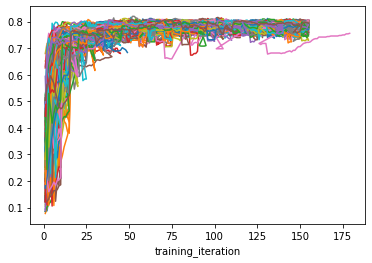

In [21]:
analysis = Analysis("../ray_tune/pop")
dfs = analysis.fetch_trial_dataframes()
# This plots everything on the same plot
ax = None
for d in dfs.values():
    ax = d.plot("training_iteration", "accuracy", ax=ax, legend=False)

plt.xlabel("iterations")
plt.ylabel("Test Accuracy")

print('best config:', analysis.get_best_config("mean_accuracy"))

In [30]:
df = get_analysis('pop3')
df.head(50)

,accuracy,training_iteration,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/beta_dim,config/alpha_sigmoid,config/method,config/tol_scale,config/leaky_relu_slope,config/heads
3,0.848,86,8.021537,0.038690,32,0.001521,0.130842,3.500492,0.279041,adam,vc,vc,True,dopri5,1134.857175,0.2,5
11,0.847,65,8.641346,0.010521,32,0.005749,0.395423,0.870223,0.506410,adam,vc,vc,True,dopri5,54.900416,0.2,5
13,0.847,53,9.752309,0.003669,16,0.001878,0.402538,1.912292,0.488419,adam,vc,vc,True,dopri5,87.968444,0.2,5
0,0.844,43,8.659905,0.004068,32,0.003814,0.610651,1.740030,0.262222,adam,vc,vc,True,dopri5,567.896204,0.2,5
8,0.843,93,1.681942,0.021820,32,0.011936,0.730624,4.829096,0.058223,adam,vc,vc,True,dopri5,521.874088,0.2,5
4,0.841,50,7.192898,0.020017,64,0.001050,0.684789,1.572164,0.002229,adam,vc,vc,True,dopri5,1842.481467,0.2,5
14,0.840,92,8.108572,0.006161,16,0.011133,0.030070,4.864997,0.197170,adam,vc,vc,True,dopri5,12.976330,0.2,5
10,0.838,93,2.491589,0.004395,64,0.008834,0.030035,4.166782,0.019468,adam,vc,vc,True,dopri5,1471.563001,0.2,5
15,0.838,56,6.523977,0.023814,32,0.002452,0.499982,0.912092,0.164301,adam,vc,vc,True,dopri5,7574.657615,0.2,5
9,0.837,24,9.019233,0.025546,32,0.005225,0.359115,1.055203,0.096674,adam,vc,vc,True,dopri5,46.588292,0.2,5
